# Ciencia de Datos aplicada a la predicción de precios del Mercado Eléctrico Mayorista
### Curso Data Science de CODERHOUSE
### Lucas Grillo


# 1. Temática: Mercado Eléctrico Mayorista

## 1.1 Abstracto

En un mundo cada vez más industrializado y dominado por el uso de dispositivos eléctricos, es válido plantearse el desafío que nos presenta el incremento de consumo energético, en particular el World Energy Council en 2019 estimó un crecimiento de la demanda eléctrica entre 45-60%. 
No es solo el incremento de la demanda energética una problemática a resolver sino también que fuentes de energías se utilizaran para abastecerá a la misma. En una sociedad que hace años exige un cambio climático, en la cual se busca abandonar las viejas fuentes de energías convencionales (carbón y gas) como así también la energía nuclear; ¿qué implicancias tendrán estos cambios en el precio de la energía? ¿Adicionalmente, es posible una matriz energética compuesta únicamente por fuentes de energías renovables? ¿O es solo una utopía? 
El presente trabajo busca aplicar lo aprendido en el curso de Ciencia de Datos de CODERHOUSE para analizar la composición de la matriz energética de España, y entender como se relacionan las distintas fuentes de energía que se utilizan para abastecer la demanda eléctrica, finalmente mediante algoritmos de Machine Learning se buscará alcanzar un modelo para realizar la predicción de precios de la energía en el Mercado Eléctrico Mayorista.
Como fuente de trabajo, se utilizó el conjunto de datos obtenidos de la página web de Kaggle  denominado “Hourly energy demand generation and weather” el cual contiene datos que describen la matriz energética de España del año 2015 a 2018, como así también información climática de 5 ciudades de España (Madrid, Barcelona, Valencia, Sevilla y Bilbao).


## 1.2 Problema a Resolver

El presente trabajo busca analizar, a partir de la base de datos obtenida, los siguientes conceptos:
*   Composición de la matriz energética.
*   Incremento de la demanda energética.
*   Relación entre las distintas fuentes de energía.
*   Comportamiento de la demanda, la fuente de energía y las condiciones climáticas, y la relación entre las mismas.
*   Como se relacionan los precios y las fuentes de energía renovable.
*   Precisión con la cual se puede predecir el precio de la energía.


# 2. Estructura de Datos (EDA)

Se realiza la importación de las librerias a utilizar y los datasets:

Fuente: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather

DataSet 1: energy_dataset.csv

DataSet 2: weather_features.csv

In [3]:
import math
from google.colab import drive
import matplotlib.pyplot as plt
import random
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib as mpl
from datetime import date,timedelta,datetime
import json
import statsmodels.api as sm
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import requests
import openpyxl
from openpyxl import Workbook
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

drive.mount("/content/gdrive",force_remount=True)
dfEnergy = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE/datasets/energy_dataset.csv')
dfWeather = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE/datasets/weather_features.csv')

Mounted at /content/gdrive


In [ ]:
print(dfEnergy.shape)
print(dfWeather.shape)

(35064, 29)
(178396, 17)


El primer DataSet que contiene los datos de la generación eléctrica en paso horario de 4 años de España cuenta con 35064 filas y 29 columnas, mientras que la base de datos climáticas contiene 178396 filas y 17 columnas,

In [2]:
dfEnergy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [3]:
dfEnergy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


Se observa que la base de datos de energía contiene la generación eléctrica provenientes de distintas fuentes, tanto convencional como renovable, como así también la demanda eléctrica total estimada y real. 
Asimismo presenta la generación renovable pronósticada,y el precio de la energia a cada hora, tanto el estimado el día anterior como el real. 

In [ ]:
dfWeather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [ ]:
dfWeather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Por otro lado, en la base de datos climáticos contamos con varias varibles climáticas, como la temperatura, presión, humedad, etc. Dicha información se presenta en paso horario, durante 4 años, registrada en 5 ciudades distintas de España.

## 2.1 Limpieza de Datos

Primero se realizar un limpieza y reordenamiento de la base de datos del clima.
Primero se eliminan las columnas de weather_icon y weather_id ya que no brindan datos que se consideren relevantes

In [4]:
dfWeather = dfWeather.drop('weather_icon',axis=1)
dfWeather = dfWeather.drop('weather_id',axis=1)

Posteriormente se reemplazan las variables del tipo char, para trabajar únicamente con las variables numéricas.

In [5]:
print(dfWeather['weather_main'].unique())
print(dfWeather['weather_description'].unique())

['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze' 'snow' 'dust' 'squall']
['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'light rain' 'moderate rain' 'heavy intensity rain'
 'mist' 'heavy intensity shower rain' 'shower rain' 'very heavy rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'thunderstorm with rain' 'proximity thunderstorm' 'thunderstorm'
 'light intensity shower rain' 'light intensity drizzle' 'fog' 'drizzle'
 'smoke' 'heavy intensity drizzle' 'haze' 'proximity shower rain'
 'light intensity drizzle rain' 'light snow' 'rain and snow'
 'light rain and snow' 'snow' 'light thunderstorm' 'heavy snow' 'sleet'
 'rain and drizzle' 'shower sleet' 'light shower sleet'
 'light shower snow' 'proximity moderate rain' 'ragged shower rain'
 'sand dust whirls' 'proximity drizzle' 'dust' 'squalls']


In [6]:
dfWeatherDescription = pd.get_dummies(dfWeather['weather_description'])
dfWeatherMain = pd.get_dummies(dfWeather['weather_main'])
dfWeather = dfWeather.drop('weather_description',axis=1)
dfWeather = dfWeather.drop('weather_main',axis=1)

Una vez reemplazados las variables char por variables numéricas, se incorporan a la base de datos original.

In [7]:
dfWeather=pd.concat([dfWeather,dfWeatherMain],axis=1)
dfWeather=pd.concat([dfWeather,dfWeatherDescription],axis=1)

Se realiza una limpieza de los datos del clima,en particular datos no numéricos, como así también se eliminan los duplicados del dato fecha-hora ya que los mismos deben ser únicos.
Adicionalmente se separa la base de datos del clima una por cada ciudad de la cual se tiene información

In [8]:
horasEnergy = dfEnergy.time.unique()
horasWeather = dfWeather.dt_iso.unique()
horasMadrid = dfWeather.loc[dfWeather['city_name'] == 'Madrid', 'dt_iso']
horasValencia = dfWeather.loc[dfWeather['city_name'] == 'Valencia', 'dt_iso']
horasBilbao = dfWeather.loc[dfWeather['city_name'] == 'Bilbao', 'dt_iso']
horasBarcelona = dfWeather.loc[dfWeather['city_name'] == 'Barcelona', 'dt_iso']
horasSevilla = dfWeather.loc[dfWeather['city_name'] == 'Seville', 'dt_iso']


dfWeatherValencia = dfWeather.loc[dfWeather['city_name'] == 'Valencia']
dfWeatherMadrid = dfWeather.loc[dfWeather['city_name'] == 'Madrid']
dfWeatherBilbao = dfWeather.loc[dfWeather['city_name'] == 'Bilbao']
dfWeatherBarcelona = dfWeather.loc[dfWeather['city_name'] == ' Barcelona']
dfWeatherSevilla = dfWeather.loc[dfWeather['city_name'] == 'Seville']


dfWeatherValencia = dfWeatherValencia.drop_duplicates(subset=["dt_iso"])
dfWeatherMadrid = dfWeatherMadrid.drop_duplicates(subset=["dt_iso"])
dfWeatherBilbao = dfWeatherBilbao.drop_duplicates(subset=["dt_iso"])
dfWeatherBarcelona = dfWeatherBarcelona.drop_duplicates(subset=["dt_iso"])
dfWeatherSevilla = dfWeatherSevilla.drop_duplicates(subset=["dt_iso"])

En cuanto a la base de datos que contiene información de la matriz energética, se reemplazan los NaN por ceros

In [9]:
columnsEnergy = dfEnergy.columns
for i in range(len(columnsEnergy)):
  dfEnergy[columnsEnergy[i]] = dfEnergy[columnsEnergy[i]].fillna(0)

In [8]:
dfEnergy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,35064.0,...,35064.000000,35064.0,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.305727,447.829198,0.0,5619.851072,4253.880903,298.158139,0.0,0.0,0.0,0.0,...,269.306126,0.0,5461.674595,1439.066735,0.0,5471.216689,28712.129962,28667.476928,49.874341,57.884023
std,85.796305,354.622834,0.0,2204.946787,1963.465684,52.963429,0.0,0.0,0.0,0.0,...,50.572208,0.0,3215.250084,1677.703355,0.0,3176.312853,4594.100854,4664.083855,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,237.000000,18105.000000,0.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4125.000000,2524.750000,263.000000,0.0,0.0,0.0,0.0,...,240.000000,0.0,2930.750000,69.000000,0.0,2979.000000,24793.750000,24800.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,0.0,...,279.000000,0.0,4847.000000,576.000000,0.0,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6428.000000,5837.000000,330.000000,0.0,0.0,0.0,0.0,...,310.000000,0.0,7397.000000,2636.000000,0.0,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,0.0,...,357.000000,0.0,17436.000000,5836.000000,0.0,17430.000000,41390.000000,41015.000000,101.990000,116.800000


Luego se eliminan las columnas que únicamente contengan ceros

In [10]:
dfEnergy = dfEnergy.loc[:, (dfEnergy != 0).any(axis=0)]

In [10]:
dfEnergy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.305727,447.829198,5619.851072,4253.880903,298.158139,475.319644,971.589351,2603.777407,6260.870123,60.197667,85.595739,1431.930470,269.306126,5461.674595,1439.066735,5471.216689,28712.129962,28667.476928,49.874341,57.884023
std,85.796305,354.622834,2204.946787,1963.465684,52.963429,792.269198,401.307115,1835.677348,850.714243,20.279128,14.207003,1680.002043,50.572208,3215.250084,1677.703355,3176.312853,4594.100854,4664.083855,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,0.000000,2.060000,9.330000
25%,333.000000,0.000000,4125.000000,2524.750000,263.000000,0.000000,637.000000,1076.000000,5757.000000,53.000000,73.000000,70.000000,240.000000,2930.750000,69.000000,2979.000000,24793.750000,24800.000000,41.490000,49.347500
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,67.000000,905.000000,2163.000000,6563.500000,57.000000,88.000000,615.000000,279.000000,4847.000000,576.000000,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,6428.000000,5837.000000,330.000000,615.000000,1250.000000,3756.250000,7024.000000,80.000000,97.000000,2575.250000,310.000000,7397.000000,2636.000000,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


A los conjuntos de datos se les adicionan tres columnas que contienen el Año, el Mes y la Hora.

In [11]:
for i in range(len(dfEnergy['time'])):
    input = dfEnergy['time'].iloc[i]
    input = input[:len(input)-9]
    dfEnergy['time'].iloc[i]=input
ano=[]
mes=[]
dia =[]
horas =[]
for i in range(len(dfEnergy['time'])):
    input = dfEnergy['time'].iloc[i]
    input = input[:len(input)-12]
    ano.append((input))
for i in range(len(dfEnergy['time'])):
    input = dfEnergy['time'].iloc[i]
    if input[5]=='0':
        input = input[6:len(input) - 9]
    else:
        input = input[5:len(input)-9]
    mes.append(int(input))
for i in range(len(dfEnergy['time'])):
    input = dfEnergy['time'].iloc[i]
    if input[8]=='0':
        input = input[9:len(input) - 6]
    else:
        input = input[8:len(input)-6]
    dia.append(int(input))
for i in range(len(dfEnergy['time'])):
    input = dfEnergy['time'].iloc[i]
    if input[11]=='0' and input[12]=='0':
        input='24'
    elif input[11]=='0' and input[12]!='0':
        input = input[12:len(input) - 3]
    else:
        input = input[11:len(input)-3]
    horas.append(int(input))


dfWeatherBarcelona = dfWeatherBarcelona.assign(Año= ano,Mes=mes,dia=dia,hora=horas)
dfWeatherMadrid = dfWeatherMadrid.assign(Año= ano,Mes=mes,dia=dia,hora=horas)
dfWeatherValencia = dfWeatherValencia.assign(Año= ano,Mes=mes,dia=dia,hora=horas)
dfWeatherBilbao = dfWeatherBilbao.assign(Año= ano,Mes=mes,dia=dia,hora=horas)
dfWeatherSevilla = dfWeatherSevilla.assign(Año= ano,Mes=mes,dia=dia,hora=horas)

dfWeather=pd.concat([dfWeatherValencia,dfWeatherBilbao,dfWeatherSevilla,dfWeatherMadrid,dfWeatherBarcelona])
dfEnergy = dfEnergy.assign(Año= ano,Mes=mes,dia=dia,hora=horas)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


A continuación comprobamos que las 5 bases que se han creado tengan las mismas cantidad de filas, correspondientes a cada hora del año por los 4 años por los que se tiene información.

In [12]:
print(dfWeatherBarcelona.shape)
print(dfWeatherMadrid.shape)
print(dfWeatherValencia.shape)
print(dfWeatherBilbao.shape)
print(dfWeatherSevilla.shape)
print(dfEnergy.shape)

(35064, 72)
(35064, 72)
(35064, 72)
(35064, 72)
(35064, 72)
(35064, 25)


Se combinan los dataset de las condiciones climáticas con los de energía para realizar un anális combinado; resultando en un conjunto de datos por cada una de las 5 ciudad de España de las cuales se tienen datos.

In [12]:
dfEnergyMadrid =pd.merge(dfEnergy,dfWeatherMadrid,how='outer')
dfEnergySevilla =pd.merge(dfEnergy,dfWeatherSevilla,how='outer')
dfEnergyBarcelona =pd.merge(dfEnergy,dfWeatherBarcelona,how='outer')
dfEnergyValencia =pd.merge(dfEnergy,dfWeatherValencia,how='outer')
dfEnergyBilbao =pd.merge(dfEnergy,dfWeatherBilbao,how='outer')

Se eliminan datos adicionales innecesarios, como el nombre de la ciudad, la columna de 'time' y 'dt_iso' ya que el formato de hora se transformo a información de 4 columnas, hora, dia, mes, año

In [14]:
dfEnergyMadrid.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'Año', 'Mes', 'dia', 'hora', 'dt_iso', 'city_name',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'clear',
       'clouds', 'drizzle', 'dust', 'fog', 'haze', 'mist', 'rain', 'smoke',
       'snow', 'squall', 'thunderstorm', 'broken clouds', 'drizzle', 'dust',
       'few 

In [13]:
dfEnergyMadrid = dfEnergyMadrid.drop('time',axis=1)
dfEnergyMadrid = dfEnergyMadrid.drop('city_name',axis=1)
dfEnergyMadrid = dfEnergyMadrid.drop('dt_iso',axis=1)
dfEnergyBarcelona = dfEnergyBarcelona.drop('time',axis=1)
dfEnergyBarcelona = dfEnergyBarcelona.drop('city_name',axis=1)
dfEnergyBarcelona = dfEnergyBarcelona.drop('dt_iso',axis=1)
dfEnergySevilla = dfEnergySevilla.drop('time',axis=1)
dfEnergySevilla = dfEnergySevilla.drop('city_name',axis=1)
dfEnergySevilla = dfEnergySevilla.drop('dt_iso',axis=1)
dfEnergyValencia = dfEnergyValencia.drop('time',axis=1)
dfEnergyValencia = dfEnergyValencia.drop('city_name',axis=1)
dfEnergyValencia = dfEnergyValencia.drop('dt_iso',axis=1)
dfEnergyBilbao = dfEnergyBilbao.drop('time',axis=1)
dfEnergyBilbao = dfEnergyBilbao.drop('city_name',axis=1)
dfEnergyBilbao = dfEnergyBilbao.drop('dt_iso',axis=1)


## 2.2 Visualización de Datos

A continuación se observa como se ha distribuido la matriz energética de españa en un período de 4 años (2015-2018), descartando toda fuente de generación que se encuentre por debajo del 2% del total

In [ ]:
dfEnergy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'Año', 'Mes', 'dia', 'hora'],
      dtype='object')

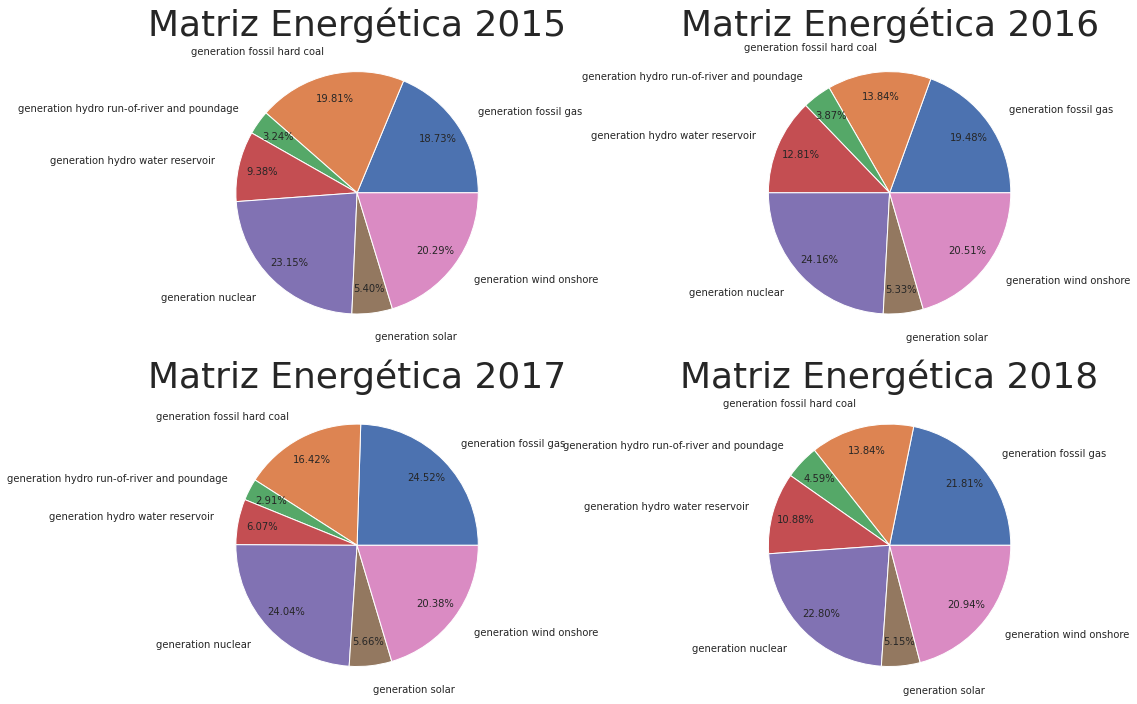

In [ ]:
generationType = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore']
generationTypeModif =[]
genTotal = 0
porcentajeFuera = 2/100
for i in range(len(generationType)):
    genTotal = genTotal+dfEnergy[generationType[i]].sum()

for i in range(len(generationType)):
    avg = dfEnergy[generationType[i]].sum()/genTotal
    if(avg<porcentajeFuera or math.isnan(dfEnergy[generationType[i]].mean())):
        dfEnergy=dfEnergy.drop(columns=generationType[i])
    else:
        generationTypeModif.append(generationType[i])

generationType = generationTypeModif

anos = dfEnergy.Año.unique()
genPerYear= dfEnergy.groupby('Año')[generationType].sum()

genBefore = genTotal
genTotal=0
for i in range(len(generationType)):
    genTotal = genTotal+dfEnergy[generationType[i]].sum()
fig, axs = plt.subplots(2, 2,figsize=(15,10))

fig.tight_layout(pad=1.5)

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(genPerYear.iloc[0],labels=genPerYear.columns,autopct='%0.2f%%',pctdistance = 0.8, labeldistance = 1.2,textprops={'fontsize': 10})
plt.title('Matriz Energética 2015')

ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(genPerYear.iloc[1],labels=genPerYear.columns,autopct='%0.2f%%',pctdistance = 0.8, labeldistance = 1.2,textprops={'fontsize': 10})
plt.title('Matriz Energética 2016')


ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(genPerYear.iloc[2],labels=genPerYear.columns,autopct='%0.2f%%',pctdistance = 0.8, labeldistance = 1.2,textprops={'fontsize': 10})
plt.title('Matriz Energética 2017')

ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(genPerYear.iloc[3],labels=genPerYear.columns,autopct='%0.2f%%',pctdistance = 0.8, labeldistance = 1.2,textprops={'fontsize': 10})
plt.title('Matriz Energética 2018')

plt.show()


En el siguiente gráfico se puede observar la cantidad de generación eléctrica renovable en los 4 años analizdos, separados por fuente de tecnología, considerando las energías renovables mas representativas en cuanto a generación eléctrica.

   Year                                     genType  Gen Amount
0  2015  generation hydro run-of-river and poundage   7640464.0
1  2016  generation hydro run-of-river and poundage   8979239.0
2  2017  generation hydro run-of-river and poundage   6731314.0
3  2018  generation hydro run-of-river and poundage  10716792.0
4  2015                            generation solar  12740055.0


[Text(0, 0.5, 'Generación (MWh)'),
 Text(0.5, 0, 'Años'),
 Text(0.5, 1.0, 'Generación Renovable')]

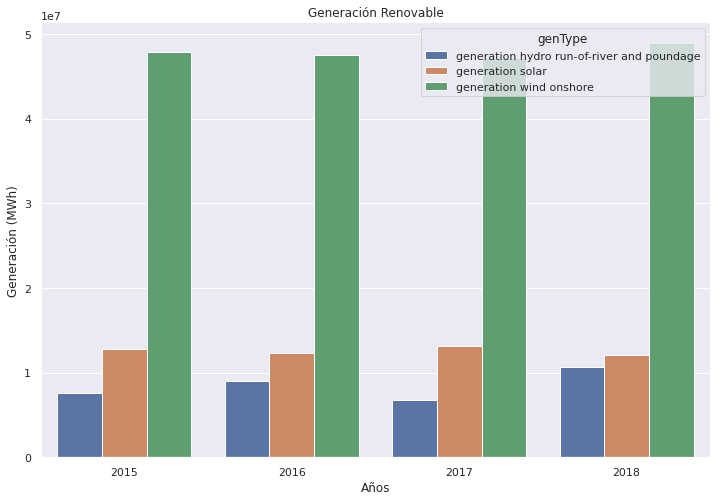

In [ ]:
genRenovable = ['generation hydro run-of-river and poundage','generation solar', 'generation wind onshore']
dfRenovable = pd.DataFrame({
    'Year':[2015,2016,2017,2018,2015,2016,2017,2018,2015,2016,2017,2018],
    'genType':[genRenovable[0],genRenovable[0],genRenovable[0],genRenovable[0],
    genRenovable[1],genRenovable[1],genRenovable[1],genRenovable[1],
    genRenovable[2], genRenovable[2], genRenovable[2], genRenovable[2]],
    'Gen Amount':[genPerYear[genRenovable[0]].iloc[0],genPerYear[genRenovable[0]].iloc[1],genPerYear[genRenovable[0]].iloc[2],genPerYear[genRenovable[0]].iloc[3],
    genPerYear[genRenovable[1]].iloc[0],genPerYear[genRenovable[1]].iloc[1],genPerYear[genRenovable[1]].iloc[2],genPerYear[genRenovable[1]].iloc[3],
    genPerYear[genRenovable[2]].iloc[0],genPerYear[genRenovable[2]].iloc[1],genPerYear[genRenovable[2]].iloc[2],genPerYear[genRenovable[2]].iloc[3]]
})
print(dfRenovable.head())
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.barplot(x = 'Year', y = dfRenovable['Gen Amount'],hue='genType',data =dfRenovable).set(xlabel ="Años", ylabel = "Generación (MWh)", title ='Generación Renovable')


Se observa que no ha habido un crecimiento considerable de energías renovables en el período 2015-2018

A continuación se observan los perfiles de carga de cada fuente de generción, de lo cul se ve la gran variabildiad de la generación solar durante las 24 horas del dia.

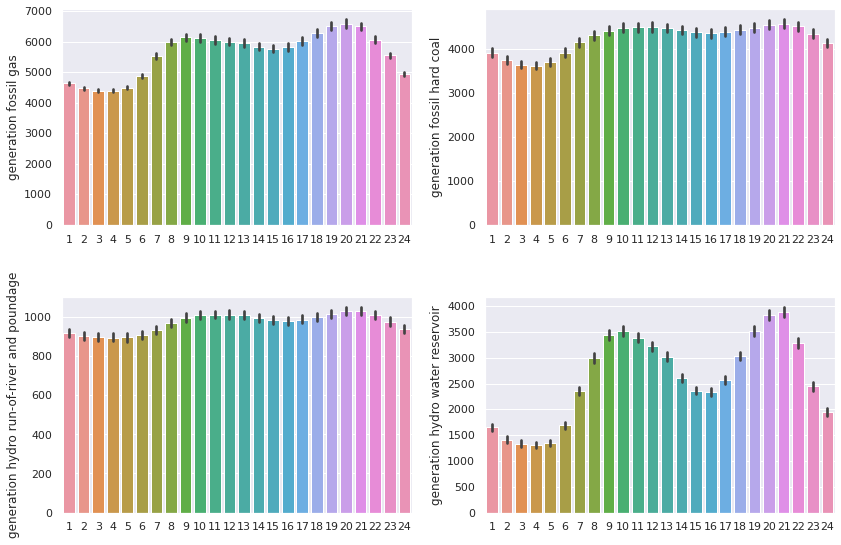

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(12,8))
sns.set(font_scale=1)
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[0]],ax=axs[0,0])
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[1]],ax=axs[0,1])
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[2]],ax=axs[1,0])
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[3]],ax=axs[1,1])
fig.tight_layout(pad=1.5)

plt.show()

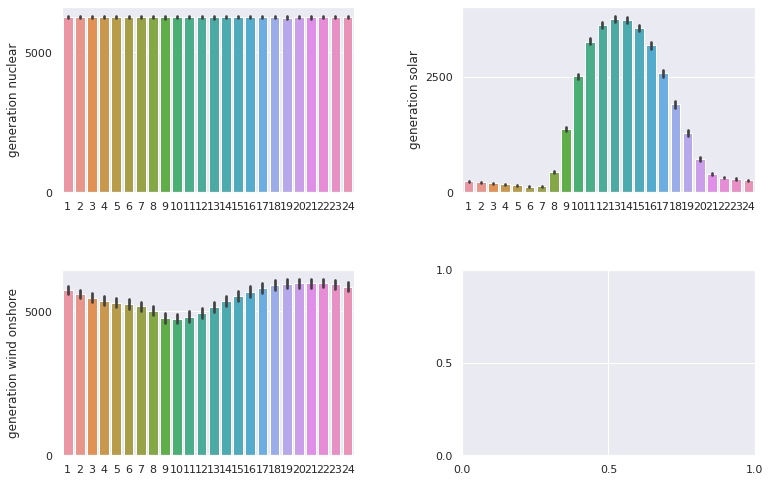

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(12,8))
sns.set(font_scale=3)
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[4]],ax=axs[0,0])
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[5]],ax=axs[0,1])
sns.barplot(data=dfEnergy, x=horas,y=dfEnergy[generationType[6]],ax=axs[1,0])
fig.tight_layout(pad=1.5)
plt.show()

A continuación se observa la relación entre la temperatura media horaria y la generación

In [ ]:
dfEnergy['hora'].unique

<bound method Series.unique of 0        24
1         1
2         2
3         3
4         4
         ..
35059    19
35060    20
35061    21
35062    22
35063    23
Name: hora, Length: 35064, dtype: int64>

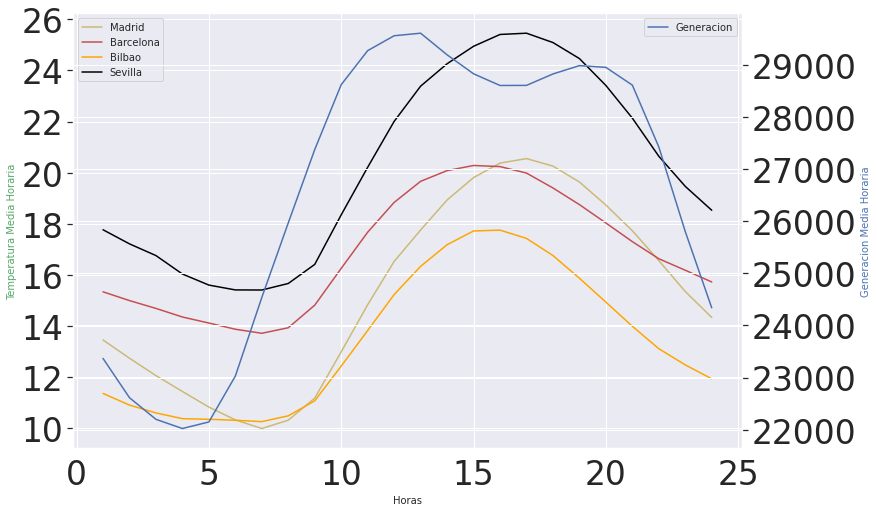

In [ ]:
tempMadridPerHour = dfEnergyMadrid.groupby('hora')['temp'].mean()
tempBarcelonaPerHour = dfEnergyBarcelona.groupby('hora')['temp'].mean()
tempBilbaoPerHour = dfEnergyBilbao.groupby('hora')['temp'].mean()
tempSevillaPerHour = dfEnergySevilla.groupby('hora')['temp'].mean()
tempValenciaPerHour = dfEnergyValencia.groupby('hora')['temp'].mean()

genPerHourGen = []
for i in range(len(generationType)):
    genPerHourGen.append(dfEnergy.groupby('hora')[generationType[i]].mean())

genPerHour=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
hours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
for i in range(len(generationType)):
    for hours in range(24):
        genPerHour[hours] = genPerHour[hours] + genPerHourGen[i].iloc[hours]

for i in range(len(tempMadridPerHour)):
    tempMadridPerHour.iloc[i] = tempMadridPerHour.iloc[i] - 273
    tempBarcelonaPerHour.iloc[i] = tempBarcelonaPerHour.iloc[i] - 273
    tempBilbaoPerHour.iloc[i] = tempBilbaoPerHour.iloc[i] - 273
    tempSevillaPerHour.iloc[i] = tempSevillaPerHour.iloc[i] - 273
    tempValenciaPerHour.iloc[i] = tempValenciaPerHour.iloc[i] - 273
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], tempMadridPerHour,'y-', label='Madrid')
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], tempBarcelonaPerHour,'r-',label='Barcelona')
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], tempBilbaoPerHour,'orange',label='Bilbao')
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], tempSevillaPerHour,'black',label='Sevilla')
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], genPerHour,label='Generacion')
ax1.legend(loc='upper left',fontsize = 10)
ax2.legend(loc='best',fontsize = 10)
ax1.set_xlabel('Horas',fontsize = 10)
ax1.set_ylabel('Temperatura Media Horaria', color='g',fontsize = 10)
ax2.set_ylabel('Generacion Media Horaria', color='b',fontsize = 10)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.show()

En el gráfico siguiente se muestra la relación entre el precio de la energía y las distintas fuentes de generación que se despachan.

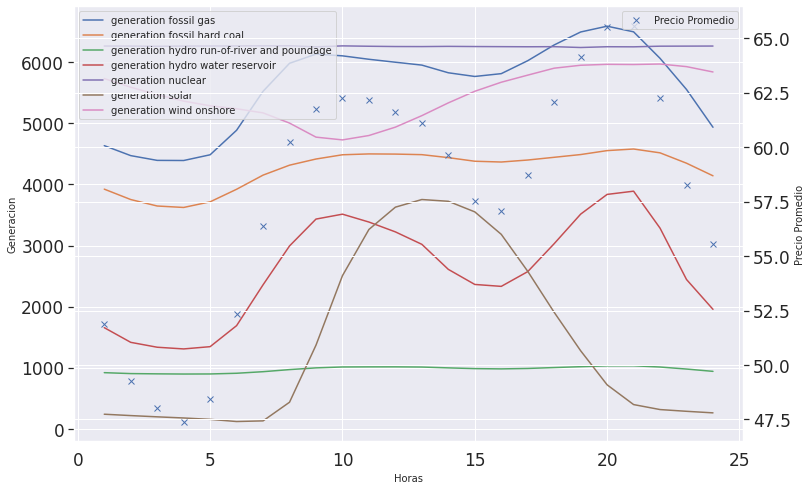

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_xlabel('Horas',fontsize=10,size=10)
ax1.set_ylabel('Generacion',fontsize=10,size=10)

ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[0]],label =generationType[0])
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[1]],label =generationType[1])
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[2]],label =generationType[2])
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[3]],label =generationType[3])
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[4]],label =generationType[4])
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[5]],label =generationType[5])
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')[generationType].mean()[generationType[6]],label =generationType[6])

plt.legend(loc='upper left',fontsize=10)

ax2 = ax1.twinx()
ax2.set_ylabel('Precio Promedio',fontsize=10,size=10)
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['price actual'].mean(),'bx',label='Precio Promedio')
plt.legend(loc='upper right',fontsize = 10)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.show()

Se observa como el precio de la energía lo empuja la generación de gas natural

Se verifican las relaciones que existen entre las condiciones climáticas y las dos principales fuentes de energía renovable

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x576 with 0 Axes>

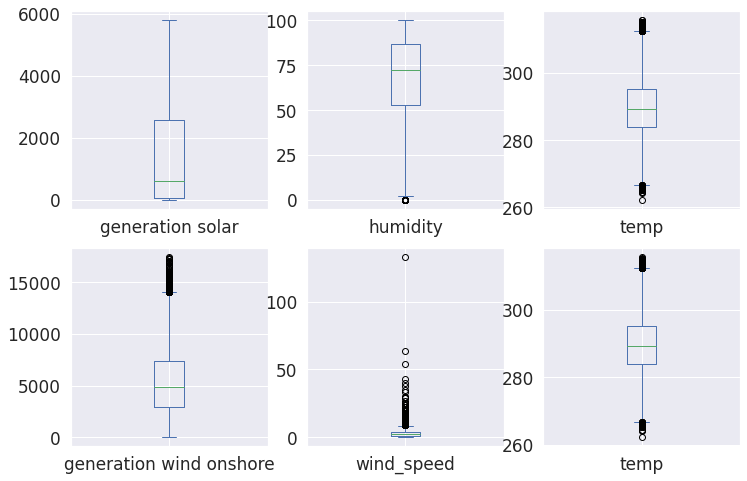

In [ ]:
plt.figure(figsize=(12,8))
fig, axs = plt.subplots(2, 3,figsize=(12,8))
dfEnergy['generation solar'].plot(kind='box',ax=axs[0,0])
dfWeather['humidity'].plot(kind='box',ax=axs[0,1])
dfWeather['temp'].plot(kind='box',ax=axs[0,2])
dfEnergy['generation wind onshore'].plot(kind='box',ax=axs[1,0])
dfWeather['wind_speed'].plot(kind='box',ax=axs[1,1])
dfWeather['temp'].plot(kind='box',ax=axs[1,2])
plt.show

Por último se analiza el impacto que tiene el pronostico de la generación solar y eólica, la generación real solar y eólica y el error que se produce en el precio proyectado y el real

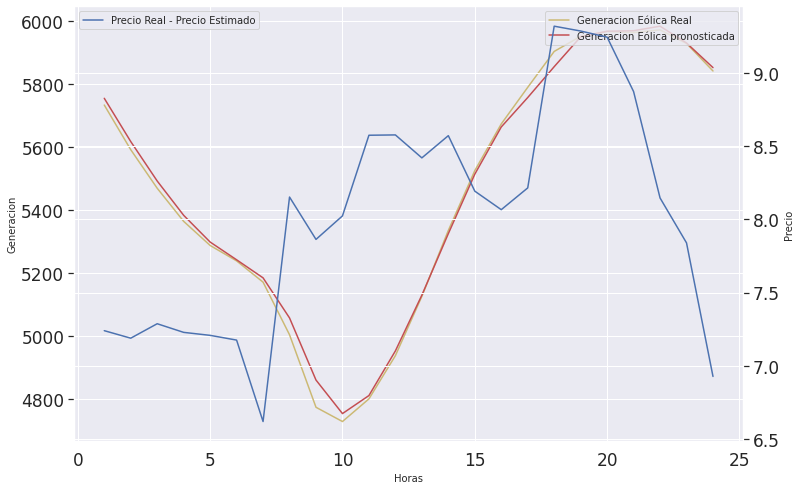

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_xlabel('Horas',fontsize=10,size=10)
ax1.set_ylabel('Generacion',fontsize=10,size=10)

ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['generation wind onshore'].mean(),'y-',label='Generacion Eólica Real')
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['forecast wind onshore day ahead'].mean(),'r-',label='Generacion Eólica pronosticada')
plt.legend(loc='upper right',fontsize = 10)
ax2 = ax1.twinx()
ax2.set_ylabel('Precio',fontsize=10,size=10)
dfDif= -dfEnergy.groupby('hora')['price day ahead'].mean() + dfEnergy.groupby('hora')['price actual'].mean()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],dfDif,label='Precio Real - Precio Estimado')
#ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['price day ahead'].mean(),label='Precio Estimado')
plt.legend(loc='upper left',fontsize=10)
plt.show()

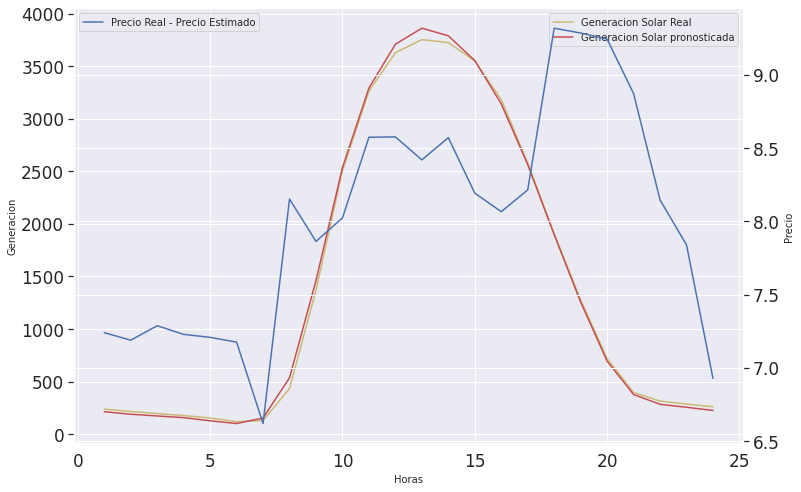

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_xlabel('Horas',fontsize=10,size=10)
ax1.set_ylabel('Generacion',fontsize=10,size=10)

ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['generation solar'].mean(),'y-',label='Generacion Solar Real')
ax1.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['forecast solar day ahead'].mean(),'r-',label='Generacion Solar pronosticada')
plt.legend(loc='upper right',fontsize = 10)
ax2 = ax1.twinx()
ax2.set_ylabel('Precio',fontsize=10,size=10)
dfDif= -dfEnergy.groupby('hora')['price day ahead'].mean() + dfEnergy.groupby('hora')['price actual'].mean()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],dfDif,label='Precio Real - Precio Estimado')
#ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], dfEnergy.groupby('hora')['price day ahead'].mean(),label='Precio Estimado')
plt.legend(loc='upper left',fontsize=10)
plt.show()

# 3. Featured Engineering

A continuación se analizará que columnas tienen nulo o bajo impacto sobre el conjunto de datos.

In [16]:
pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.7/555.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.7/230.7 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 23.2 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import featuretools as ft
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import gc
from sklearn.linear_model import LogisticRegression

In [ ]:
colFeatures = dfEnergyMadrid.columns
y = dfEnergyMadrid['price actual']
x = dfEnergyMadrid.drop('price actual',axis=1)
x = x.drop('Año',axis=1)
feature_importances = np.zeros(x.shape[1])
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [ ]:
train_features, valid_features, train_y, valid_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
y_transformed = lab.fit_transform(valid_y)
train_y_transformed = lab.fit_transform(train_y)
feature_importances = np.zeros(x.shape[1])

for i in range(2):
  train_features, valid_features, train_y, valid_y = train_test_split(x, y, test_size = 0.25, random_state = i)
  lab = preprocessing.LabelEncoder()
  y_transformed = lab.fit_transform(valid_y)

  model.fit(train_features, train_y_transformed, early_stopping_rounds=100, eval_set = [(valid_features, y_transformed)], verbose = 200)
  feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 29.5971
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 29.8497


In [ ]:
train_features.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,sky is clear,sleet,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,very heavy rain
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,...,26304.000000,26304.000000,26304.0,26304.000000,26304.0,26304.000000,26304.0,26304.000000,26304.000000,26304.0
mean,383.167997,448.183584,5618.693012,4257.901232,298.114241,471.439515,971.680695,2603.357094,6263.237454,60.184573,...,0.581394,0.000038,0.0,0.000380,0.0,0.001445,0.0,0.000152,0.000266,0.0
std,85.463383,354.571745,2201.961889,1965.380492,52.711312,786.042303,400.656891,1835.346146,849.556624,20.226574,...,0.493340,0.006166,0.0,0.019495,0.0,0.037982,0.0,0.012331,0.016311,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,333.000000,0.000000,4128.000000,2519.750000,263.000000,0.000000,638.000000,1072.000000,5764.750000,53.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,367.000000,510.000000,4971.000000,4486.000000,300.000000,67.000000,905.000000,2163.000000,6583.000000,57.000000,...,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,430.000000,757.000000,6432.000000,5843.000000,329.000000,603.000000,1250.000000,3749.000000,7025.000000,80.000000,...,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
max,592.000000,999.000000,20023.000000,8359.000000,445.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0


In [ ]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(x.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
0,generation biomass,51082.0
1,generation fossil brown coal/lignite,13963.5
2,generation fossil gas,9123.5
4,generation fossil oil,6780.5
3,generation fossil hard coal,6110.0


Se observa que la columna de generación a partir de fuente de biomas es el atributo con mayor importancia, lo cual a primera vista no parecería serlo ya que no es una de las fuentes de generación que mayor proporción tiene en la matriz energética.

In [ ]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('Hay %d Features con 0.0 de relevancia' % len(zero_features))
zero_features

Hay 34 Features con 0.0 de relevancia


['heavy intensity drizzle',
 'heavy intensity shower rain',
 'rain and drizzle',
 'rain and snow',
 'sand dust whirls',
 'shower sleet',
 'sky is clear',
 'sleet',
 'smoke',
 'snow',
 'squalls',
 'snow_3h',
 'thunderstorm with heavy rain',
 'thunderstorm with light rain',
 'thunderstorm with rain',
 'ragged shower rain',
 'dust',
 'haze',
 'light shower sleet',
 'heavy snow',
 'haze',
 'light intensity drizzle rain',
 'fog',
 'dust',
 'light rain and snow',
 'light shower snow',
 'proximity moderate rain',
 'light snow',
 'light thunderstorm',
 'mist',
 'squall',
 'smoke',
 'proximity drizzle',
 'very heavy rain']

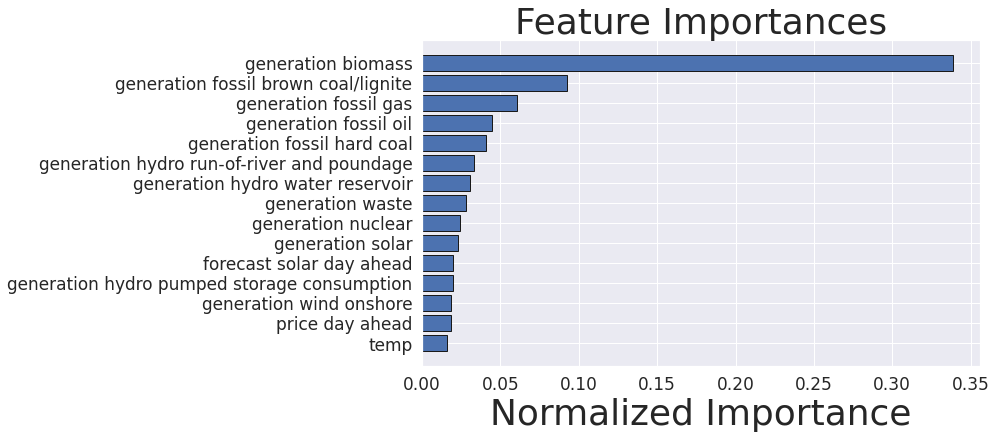

In [ ]:
plt.rcParams['font.size'] = 10
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index()
feature_importances['importance_normalized'] = feature_importances['importance'] / feature_importances['importance'].sum()
feature_importances['cumulative_importance'] = np.cumsum(feature_importances['importance_normalized'])
plt.figure(figsize = (10, 6))
ax = plt.subplot()
ax.barh(list(reversed(list(feature_importances.index[:15]))), 
feature_importances['importance_normalized'].head(15), 
align = 'center', edgecolor = 'k')
ax.set_yticks(list(reversed(list(feature_importances.index[:15]))))
ax.set_yticklabels(feature_importances['feature'].head(15))
plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
plt.show()

# 4. Algoritmos de Machine Learning

El objetivo es buscar el mejor modelo para predecir el precio de la energía.

## 4.1 Regresion Lineal

El modelo de regresión lineal es muy utilizado para la busqueda de predicción de precios, con lo cual se aplicará dicho algoritmo para el modelo.
En este caso se utilizara la base de datos que contiene información climática únicamente de la ciudad de madrid.

Se guardan las columnas originales, ya que mediante prueba y error se verificará cuales se mantienen para el modelo final de prección de precio.
Mediante una iteración, se analizan los distintos modelos, quitando atributos del original, y buscando aquel que tenga mayor r2 Score (con una tolerancia del 5%), como así también se busca el modelo que menos atributos tenga siempre y cuando esté dentro del rango del 5% del mejor r2 Score.

In [15]:
columnsOrig = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'Año', 'Mes', 'dia', 'hora', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_3h', 'clouds_all', 'clear', 'clouds', 'drizzle',
       'dust', 'fog', 'haze', 'mist', 'rain', 'smoke', 'snow', 'squall',
       'thunderstorm', 'broken clouds', 'drizzle', 'dust', 'few clouds', 'fog',
       'haze', 'heavy intensity drizzle', 'heavy intensity rain',
       'heavy intensity shower rain', 'heavy snow', 'light intensity drizzle',
       'light intensity drizzle rain', 'light intensity shower rain',
       'light rain', 'light rain and snow', 'light shower sleet',
       'light shower snow', 'light snow', 'light thunderstorm', 'mist',
       'moderate rain', 'overcast clouds', 'proximity drizzle',
       'proximity moderate rain', 'proximity shower rain',
       'proximity thunderstorm', 'ragged shower rain', 'rain and drizzle',
       'rain and snow', 'sand dust whirls', 'scattered clouds', 'shower rain',
       'shower sleet', 'sky is clear', 'sleet', 'smoke', 'snow', 'squalls',
       'thunderstorm', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'very heavy rain']

In [ ]:
columns= columnsOrig
lenIteration = len(columns)
numIteration = 0
y = dfEnergyMadrid['price actual']
modelSave=columns
r2Score = 0
while(numIteration<lenIteration):
  for i in range(len(columns)):
    colTemp = columns[:i+1]
    x = dfEnergyMadrid[colTemp]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    coeff_dfEnergy = pd.DataFrame(regressor.coef_,x.columns, columns=['Coeficientes'])
    y_pred = regressor.predict(X_test)
    if numIteration == 0 and i ==0:
      r2Score = r2_score(y_test,y_pred)
    else:
      if(r2_score(y_test,y_pred)>=(r2Score*1.05)):
        modelSave = columns
        r2Score=r2_score(y_test,y_pred)
      elif( (r2_score(y_test,y_pred)>=r2Score) and (r2_score(y_test,y_pred)<(r2Score*1.05)) and (len(columns)<len(modelSave)) ):
        modelSave = columns
        r2Score=r2_score(y_test,y_pred)
  numIteration+=1
  columns = columns[1:]

A continuación se observan los atributos con los cuales se consiguieron mejores resultados

In [ ]:
modelSave

['generation fossil hard coal',
 'generation fossil oil',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'Año',
 'Mes',
 'dia',
 'hora',
 'temp',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'clouds_all',
 'clear',
 'clouds',
 'drizzle',
 'dust',
 'fog',
 'haze',
 'mist',
 'rain',
 'smoke',
 'snow',
 'squall',
 'thunderstorm',
 'broken clouds',
 'drizzle',
 'dust',
 'few clouds',
 'fog',
 'haze',
 'heavy intensity drizzle',
 'heavy intensity rain',
 'heavy intensity shower rain',
 'heavy snow',
 'light intensity drizzle',
 'light intensity drizzle rain',
 'lig

In [ ]:
columnDif=[]
isThere = 0
for i in range(len(columnsOrig)):
  for j in range(len(modelSave)):
    if(columnsOrig[i]==modelSave[j]):
      isThere = 1
      break
    else:
      isThere = 0
  if isThere == 0:
    columnDif.append(columnsOrig[i])

Los siguientes son los atributos que se considera que no son relevantes para el modelo

In [ ]:
columnDif

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil gas']

In [ ]:
y = dfEnergyMadrid['price actual']
x = dfEnergyMadrid[modelSave]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.6330486581315504

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE
print('El r^2 es:',r2_score(y_test,y_pred))

Mean Absolute Error: 5.979284004848635
Mean Squared Error: 74.17899787594556
Root Mean Squared Error: 8.612723023292086
El r^2 es: 0.6330486581315504


Se observa que el r2 es bastante bajo, con lo cual no estamos ante un modelo preciso.

A continuación se prueba con los atributos obtenidos anteriormente durante la realización de Featured Engineer

'generation fossil gas'

In [ ]:
x = dfEnergyMadrid
for i in range (len(zero_features)):
  x = dfEnergyMadrid.drop(zero_features[i],axis=1)

In [ ]:
x = x.drop('price actual',axis=1)
y = dfEnergyMadrid['price actual']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.635313123586002

Se observa que aun no mejora el r2 Score, esto probablemente se debe a que el set de datos contiene tantas variables que el Algoritmo de regresión lineal no es el mejor para la predicción de precio, con lo cual se utilizara el Random Forest a continuación

## 4.2 Random Forest

In [17]:
x=dfEnergyMadrid.drop('price actual',axis=1)
y=dfEnergyMadrid['price actual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,  random_state=0)

In [18]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [19]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2.7471
Mean Squared Error: 20.2768
Root Mean Squared Error: 4.503
(R^2) Score: 0.8989
Train Score : 93.85% and Test Score : 89.89% using Random Tree Regressor.
Accuracy: 94.49 %.


Con el Algoritmo de Random Forest se alcanza una precisión del 94.5%, de todas maneras se utilizara la técnica de hiperparametrización para mejorar el modelo

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
X = dfEnergyMadrid.drop('price actual',axis=1)
y = dfEnergyMadrid['price actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train)

print(" Resultados de la busqueda Random " )
print("\n El mejor estimador a través de todos los parametos es:\n", randm_src.best_estimator_)
print("\n El mejor estimador a través de todos los parametos es:\n", randm_src.best_score_)
print("\n El mejor estimador a través de todos los parametos es:\n", randm_src.best_params_)

 Resultados de la busqueda Random 

 El mejor estimador a través de todos los parametos es:
 GradientBoostingRegressor(learning_rate=0.2658606899825039, max_depth=5,
                          n_estimators=233, subsample=0.7338443507530448)

 El mejor estimador a través de todos los parametos es:
 0.9229437141507163

 El mejor estimador a través de todos los parametos es:
 {'learning_rate': 0.2658606899825039, 'max_depth': 5, 'n_estimators': 233, 'subsample': 0.7338443507530448}


Se corre nuevamente el algoritmo de random forest con las nuevas variables de max_depth y n_estimators

In [ ]:
x=dfEnergyMadrid.drop('price actual',axis=1)
y=dfEnergyMadrid['price actual']
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,  random_state=0)
model = RandomForestRegressor(n_estimators=233, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=5, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 4.6291
Mean Squared Error: 55.5266
Root Mean Squared Error: 7.4516
(R^2) Score: 0.723
Train Score : 73.19% and Test Score : 72.30% using Random Tree Regressor.
Accuracy: 90.41 %.


Se observa que no hay mejoras a la corrida anterior.

Se concluye que el mejor algoritmo, de los dos utilizados, es el random forest, con una precisión del 94.5% y un r2 score de 0.9

###Que pasaria si del modelo eliminamos el forecasta price day ahead? 

In [27]:
X = dfEnergyMadrid.drop('price actual',axis=1)
X = X.drop('price day ahead',axis=1)
y = dfEnergyMadrid['price actual']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  random_state=0)

In [28]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [29]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.7819
Mean Squared Error: 27.2564
Root Mean Squared Error: 5.2208
(R^2) Score: 0.8641
Train Score : 90.91% and Test Score : 86.41% using Random Tree Regressor.
Accuracy: 92.45 %.


se osberva que la precisión disminuye un 2%

###Que pasaria si del modelo eliminamos la información de la generación de biomasa que anteriormente figuraba como uno de los features mas importantes? 

In [14]:
X = dfEnergyMadrid.drop('price actual',axis=1)
X = X.drop('price day ahead',axis=1)
X = X.drop('generation biomass',axis=1)

y = dfEnergyMadrid['price actual']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.7932
Mean Squared Error: 27.4366
Root Mean Squared Error: 5.238
(R^2) Score: 0.8632
Train Score : 90.86% and Test Score : 86.32% using Random Tree Regressor.
Accuracy: 92.42 %.


### Que resultado obtentendríamos si solo utilizamos la información de la generación eléctrica? y si solo se utilizan los datos del clima?

In [18]:
columnsOrig = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'Año', 'Mes', 'dia', 'hora', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_3h', 'clouds_all', 'clear', 'clouds', 'drizzle',
       'dust', 'fog', 'haze', 'mist', 'rain', 'smoke', 'snow', 'squall',
       'thunderstorm', 'broken clouds', 'drizzle', 'dust', 'few clouds', 'fog',
       'haze', 'heavy intensity drizzle', 'heavy intensity rain',
       'heavy intensity shower rain', 'heavy snow', 'light intensity drizzle',
       'light intensity drizzle rain', 'light intensity shower rain',
       'light rain', 'light rain and snow', 'light shower sleet',
       'light shower snow', 'light snow', 'light thunderstorm', 'mist',
       'moderate rain', 'overcast clouds', 'proximity drizzle',
       'proximity moderate rain', 'proximity shower rain',
       'proximity thunderstorm', 'ragged shower rain', 'rain and drizzle',
       'rain and snow', 'sand dust whirls', 'scattered clouds', 'shower rain',
       'shower sleet', 'sky is clear', 'sleet', 'smoke', 'snow', 'squalls',
       'thunderstorm', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'very heavy rain']
columnsGen = ['generation biomass', 'generation fossil brown coal/lignite',
        'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore','total load forecast',
       'total load actual','Año', 'Mes', 'dia', 'hora']
columnsWeather = ['Año', 'Mes', 'dia', 'hora', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_3h', 'clouds_all', 'clear', 'clouds', 'drizzle',
       'dust', 'fog', 'haze', 'mist', 'rain', 'smoke', 'snow', 'squall',
       'thunderstorm', 'broken clouds', 'drizzle', 'dust', 'few clouds', 'fog',
       'haze', 'heavy intensity drizzle', 'heavy intensity rain',
       'heavy intensity shower rain', 'heavy snow', 'light intensity drizzle',
       'light intensity drizzle rain', 'light intensity shower rain',
       'light rain', 'light rain and snow', 'light shower sleet',
       'light shower snow', 'light snow', 'light thunderstorm', 'mist',
       'moderate rain', 'overcast clouds', 'proximity drizzle',
       'proximity moderate rain', 'proximity shower rain',
       'proximity thunderstorm', 'ragged shower rain', 'rain and drizzle',
       'rain and snow', 'sand dust whirls', 'scattered clouds', 'shower rain',
       'shower sleet', 'sky is clear', 'sleet', 'smoke', 'snow', 'squalls',
       'thunderstorm', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'very heavy rain']

In [21]:
X = dfEnergyMadrid[columnsGen]
y = dfEnergyMadrid['price actual']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.7709
Mean Squared Error: 27.5623
Root Mean Squared Error: 5.25
(R^2) Score: 0.8625
Train Score : 90.72% and Test Score : 86.25% using Random Tree Regressor.
Accuracy: 92.44 %.


In [24]:
X = dfEnergyMadrid[columnsWeather]
y = dfEnergyMadrid['price actual']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  random_state=0)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.6656
Mean Squared Error: 39.5019
Root Mean Squared Error: 6.2851
(R^2) Score: 0.803
Train Score : 85.67% and Test Score : 80.30% using Random Tree Regressor.
Accuracy: 90.54 %.
